# Fuzzy C-Means 分类任务

### IRIS 数据集

##### 加载数据集

In [9]:
import numpy as np

def load_iris_data(file_path):
    data = []
    labels = []
    label_mapping = {}
    label_index = 0
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                parts = line.split(',')
                features = [float(x) for x in parts[:-1]]
                label = parts[-1]
                if label not in label_mapping:
                    label_mapping[label] = label_index
                    label_index += 1
                data.append(features)
                labels.append(label_mapping[label])
    return np.array(data), np.array(labels)

# 使用示例
data_path = 'dataset/iris/iris.data'
X, y = load_iris_data(data_path)

# 输出前五个数据
print("前五个样本的特征数据:")
print(X[:5])
print("前五个样本的标签数据:")
print(y[:5])

前五个样本的特征数据:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
前五个样本的标签数据:
[0 0 0 0 0]


##### 数据预处理

In [10]:
from sklearn.preprocessing import StandardScaler

# 数据标准化函数
def standardize_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

# 数据标准化
X_scaled = standardize_data(X)

##### Fuzzy C-Means Clustering

In [11]:
import numpy as np

def fuzzy_c_means(X, c, m=2, max_iter=1000, tol=1e-4):
    n_samples, n_features = X.shape
    U = np.random.rand(n_samples, c)
    U = U / np.sum(U, axis=1, keepdims=True)
    
    losses = []
    for _ in range(max_iter):
        # 计算聚类中心
        centroids = np.dot(U.T ** m, X) / np.sum(U.T ** m, axis=1, keepdims=True)
        
        # 计算距离矩阵
        dist = np.zeros((n_samples, c))
        for i in range(c):
            dist[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        
        # 计算新的隶属度矩阵
        U_new = 1 / (dist ** (2 / (m - 1)))
        U_new = U_new / np.sum(U_new, axis=1, keepdims=True)
        
        # 计算损失
        loss = np.sum((U_new ** m) * (dist ** 2))
        losses.append(loss)
        
        # 判断收敛
        if np.linalg.norm(U_new - U) < tol:
            break
        
        U = U_new
    
    # 获取最终的聚类标签
    labels = np.argmax(U, axis=1)
    
    return centroids, labels, losses

# 使用示例
c = 3  # 聚类数
centroids, labels, losses = fuzzy_c_means(X_scaled, c)

##### 结果

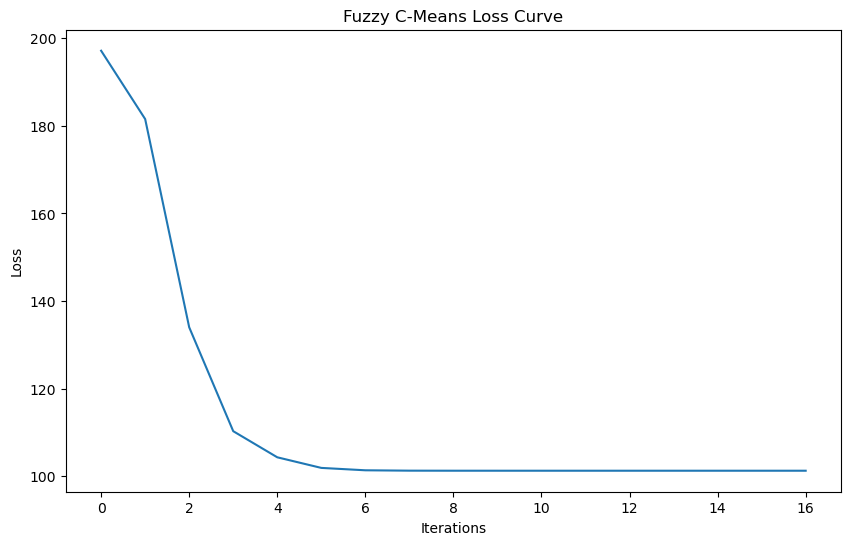

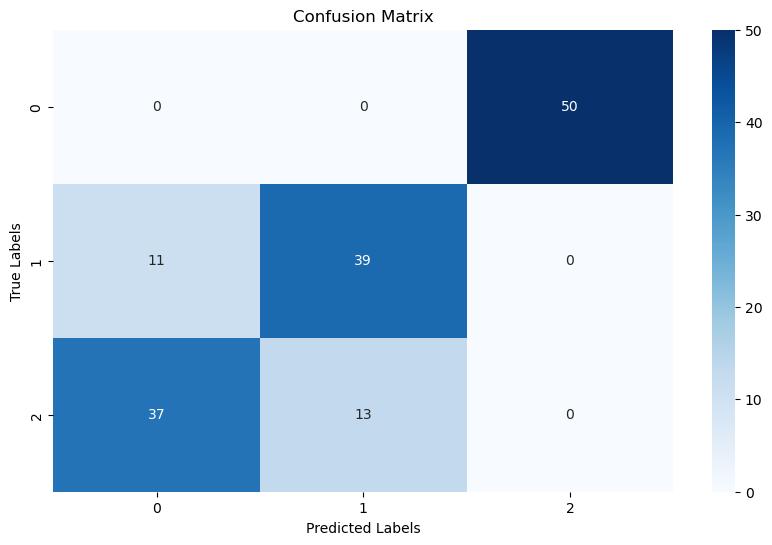

Accuracy: 0.26
Precision: 0.25
Recall: 0.26
F1-score: 0.2549019607843137


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def plot_loss_curve(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Fuzzy C-Means Loss Curve')
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')

# 使用示例
plot_loss_curve(losses)
plot_confusion_matrix(y, labels)
evaluate_model(y, labels)

### Wine数据集

### Seeds数据集